In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\RISHI MUKUNTHAN\Desktop\Data Science\Projects\Edwisor_Santander_Customer_Transaction\train.csv")
df_test = pd.read_csv(r"C:\Users\RISHI MUKUNTHAN\Desktop\Data Science\Projects\Edwisor_Santander_Customer_Transaction\test.csv")

In [8]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [11]:
X = df_train.iloc[:,2:202].values
y = df_train.iloc[:,1].values

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.preprocessing import  MinMaxScaler
mm=MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

In [39]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [47]:
model = Sequential()

model.add(Dense(units = 200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 8, activation='relu'))

model.add(Dense(units = 1, activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [49]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 160000 samples, validate on 40000 samples
Epoch 1/100
160000/160000 [==============================] - 20s 127us/sample - loss: 0.2706 - auc_4: 0.7878 - val_loss: 0.2395 - val_auc_4: 0.8510
Epoch 2/100
160000/160000 [==============================] - 19s 118us/sample - loss: 0.2487 - auc_4: 0.8336 - val_loss: 0.2414 - val_auc_4: 0.8518
Epoch 3/100
160000/160000 [==============================] - 19s 117us/sample - loss: 0.2463 - auc_4: 0.8376 - val_loss: 0.2595 - val_auc_4: 0.8516
Epoch 4/100
160000/160000 [==============================] - 19s 116us/sample - loss: 0.2464 - auc_4: 0.8375 - val_loss: 0.2458 - val_auc_4: 0.8525
Epoch 5/100
160000/160000 [==============================] - 19s 119us/sample - loss: 0.2440 - auc_4: 0.8423 - val_loss: 0.2392 - val_auc_4: 0.8524
Epoch 6/100
160000/160000 [==============================] - 19s 118us/sample - loss: 0.2433 - auc_4: 0.8427 - val_loss: 0.2417 - val_auc_4: 0.8523
Epoch 7/100
160000/160000 [==============================] - 

<AxesSubplot:>

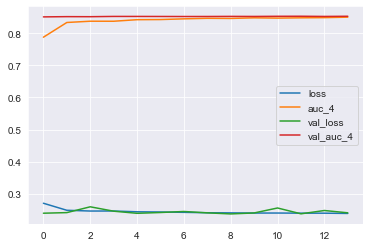

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [51]:
# Making the Confusion Matrix - True(row), Pred(Column)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
y_score = model.predict_proba(X_test)
y_pred = (y_score >= 0.5).astype(bool)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")
print(f"Area Under ROC curve: {roc_auc_score(y_test,y_score)}")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Confusion Matrix
[[35475   511]
 [ 2914  1100]]
Accuracy:0.914375
Area Under ROC curve: 0.8529849751125327
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35986
           1       0.68      0.27      0.39      4014

    accuracy                           0.91     40000
   macro avg       0.80      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



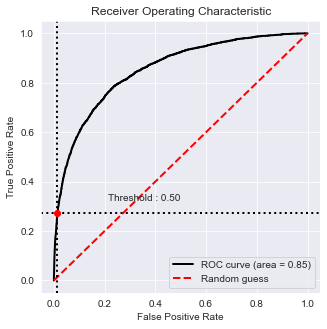

In [52]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_score, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()